In [3]:
#pip install seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df=pd.read_csv('Downloads/Zomatodataset/zomato.csv',encoding="latin-1")
#to avoid encoding issues

In [5]:
df_country=pd.read_excel('Downloads/Zomatodataset/Country-Code.xlsx')

In [6]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.


In [7]:
#we can find null values using count isnull and list also
df.isnull().sum()
[features for features in df.columns if df[features].isnull().sum() >0]

['Cuisines']

In [8]:
final_df= pd.merge(df,df_country , on='Country Code' ,how ='left')
#this is like left join.we have most content in zomato.csv so we r performing left join

In [11]:
#final_df.Country.value_counts()
country_val= final_df.Country.value_counts().values
print(country_val)

[8652  434   80   60   60   60   40   34   24   22   21   20   20   20
    4]


In [13]:
country_name= final_df.Country.value_counts().index
print(country_name)

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'UAE',
       'South Africa', 'New Zealand', 'Turkey', 'Australia', 'Phillipines',
       'Indonesia', 'Singapore', 'Qatar', 'Sri Lanka', 'Canada'],
      dtype='object', name='Country')


([<matplotlib.patches.Wedge at 0x16a84a690>,
 [Text(-1.07479320772197, 0.23413577393196094, 'India'),
  Text(1.056503577535216, -0.3062681678779072, 'United States'),
  Text(1.093560093908513, -0.118854200644337, 'United Kingdom'),
  Text(1.0979610170116392, -0.06694479160298568, 'Brazil'),
  Text(1.0997733864424146, -0.022327079365287286, 'UAE')],
 [Text(-0.5862508405756199, 0.12771042214470596, '93.17%'),
  Text(0.5762746786555722, -0.1670553642970403, '4.67%'),
  Text(0.596487323950098, -0.06482956398782018, '0.86%'),
  Text(0.598887827460894, -0.03651534087435582, '0.65%'),
  Text(0.5998763926049533, -0.012178406926520337, '0.65%')])

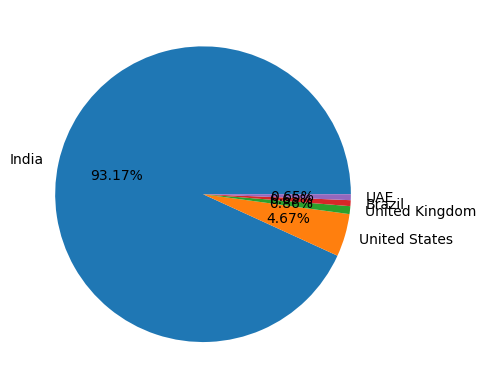

In [20]:
#Top 5 countries with high sales
plt.pie(country_val[:5], labels=country_name[:5],autopct='%1.2f%%')
#to get percentage values we add autopct and 1.2 indicate 2 vals after '.'

In [ ]:
We can observe that Zomato has maximum transactions are from India followed by united states


In [21]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [24]:
final_df.groupby(['Aggregate rating','Rating color','Rating text']).size()

Aggregate rating  Rating color  Rating text
0.0               White         Not rated      2148
1.8               Red           Poor              1
1.9               Red           Poor              2
2.0               Red           Poor              7
2.1               Red           Poor             15
2.2               Red           Poor             27
2.3               Red           Poor             47
2.4               Red           Poor             87
2.5               Orange        Average         110
2.6               Orange        Average         191
2.7               Orange        Average         250
2.8               Orange        Average         315
2.9               Orange        Average         381
3.0               Orange        Average         468
3.1               Orange        Average         519
3.2               Orange        Average         522
3.3               Orange        Average         483
3.4               Orange        Average         498
3.5               Ye

In [28]:
#final_df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index()
#we are renaming the column fro 0 - Rating_count
#And the new indexed values as Rating
Rating=final_df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating_count'})
#print(Rating)

    Aggregate rating Rating color Rating text  Rating_count
0                0.0        White   Not rated          2148
1                1.8          Red        Poor             1
2                1.9          Red        Poor             2
3                2.0          Red        Poor             7
4                2.1          Red        Poor            15
5                2.2          Red        Poor            27
6                2.3          Red        Poor            47
7                2.4          Red        Poor            87
8                2.5       Orange     Average           110
9                2.6       Orange     Average           191
10               2.7       Orange     Average           250
11               2.8       Orange     Average           315
12               2.9       Orange     Average           381
13               3.0       Orange     Average           468
14               3.1       Orange     Average           519
15               3.2       Orange     Av

Observations: Rating range and review
4.5 to 4.9 =Excellent
4.0 to 4.4 = Very good
3.5 to 3.9 = Good
2.5 to 3.4 = Average
1.8 to 2.4 = Poor

<Axes: xlabel='Aggregate rating', ylabel='Rating_count'>

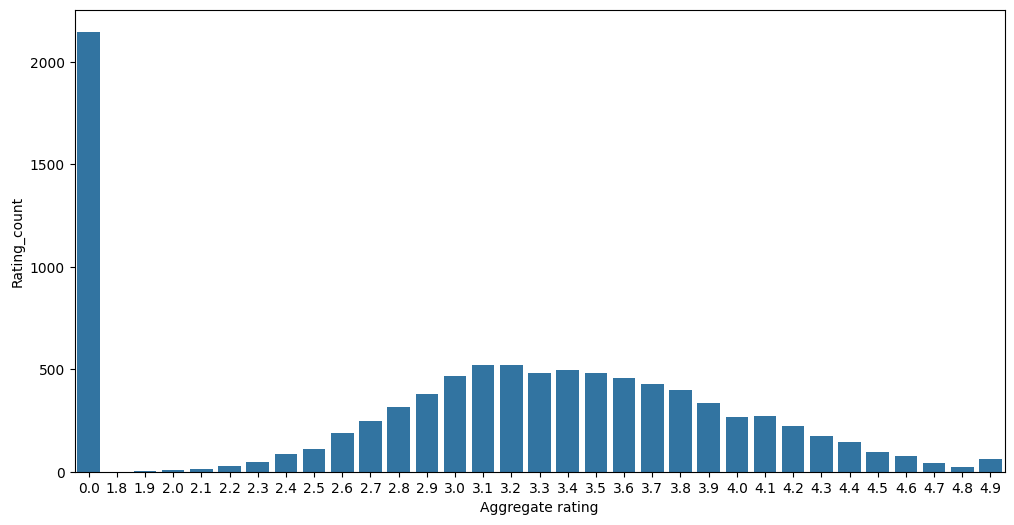

In [34]:
#to make picture size big
import matplotlib
matplotlib.rcParams['figure.figsize']=(12,6)
sns.barplot(x="Aggregate rating", y= "Rating_count", data=Rating)

<Axes: xlabel='Aggregate rating', ylabel='Rating_count'>

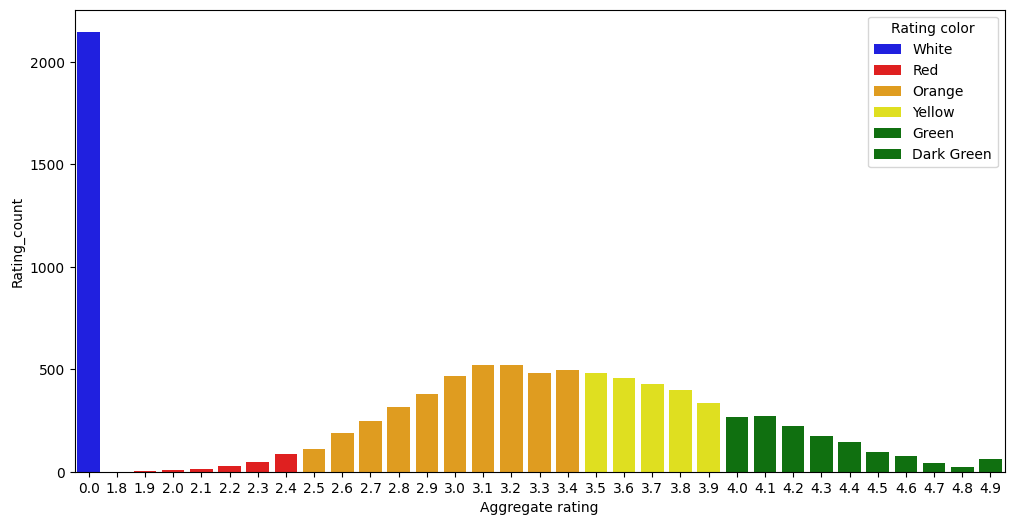

In [39]:
#Adding colors according to the review color using hue and arrange colors accordingly using palette
sns.barplot(x="Aggregate rating", y= "Rating_count",hue= 'Rating color',data=Rating,palette=['blue','red','orange','yellow','green','green'])

Observation:

Maximum peopledid not give review
Most reviews are in 2.5 - 3.4 range

/var/folders/jz/sjvlv1gd11g2ctr9z4g103rh0000gn/T/ipykernel_20897/3261806426.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Rating color", data=Rating,palette=['blue','red','orange','yellow','green','green'])


<Axes: xlabel='Rating color', ylabel='count'>

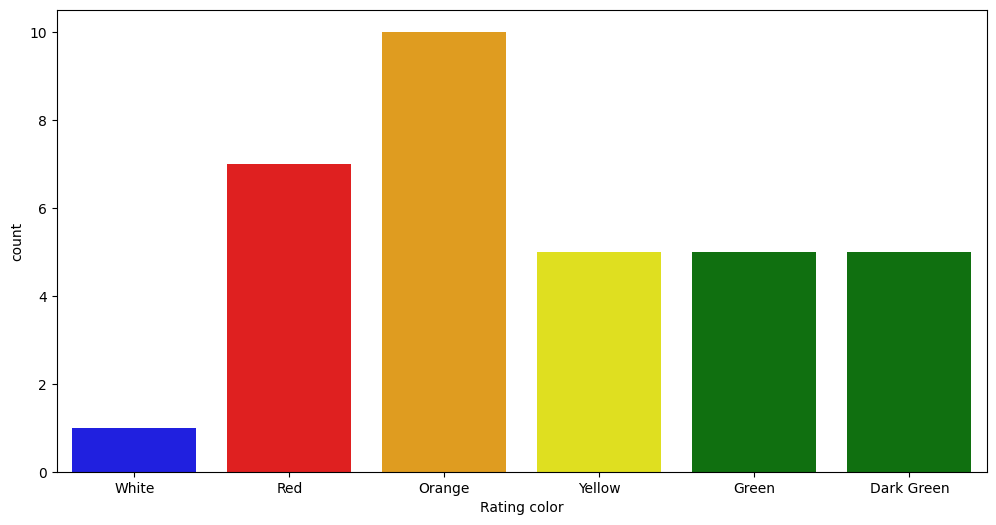

In [43]:
sns.countplot(x="Rating color", data=Rating,palette=['blue','red','orange','yellow','green','green'])

In [44]:
#Countries which gave 0 ratings
final_df.groupby(['Aggregate rating','Country']).size().reset_index().head(5)

,Aggregate rating,Country,0
0,0.0,Brazil,5
1,0.0,India,2139
2,0.0,United Kingdom,1
3,0.0,United States,3
4,1.8,India,1


Observations:

Maximum 0.0 rating is from India

In [45]:
final_df.columns


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [47]:
# finding currency of each country
final_df[['Country','Currency']].groupby(['Country','Currency']).size().reset_index(name='Count')

,Country,Currency,Count
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


In [48]:
#Finding Countries that don't have any Online delivery service
final_df[['Has Online delivery','Country']].groupby(['Has Online delivery','Country']).size().reset_index()

,Has Online delivery,Country,0
0,No,Australia,24
1,No,Brazil,60
2,No,Canada,4
3,No,India,6229
4,No,Indonesia,21
5,No,New Zealand,40
6,No,Phillipines,22
7,No,Qatar,20
8,No,Singapore,20
9,No,South Africa,60


In [53]:
#Pie plot to check the top 5 cities with maximum transactions
city_values= final_df.City.value_counts().values
city_labels=final_df.City.value_counts().index

([<matplotlib.patches.Wedge at 0x17f746810>,
 [Text(-0.6145352824185932, 0.9123301960708633, 'New Delhi'),
  Text(0.0623675251198054, -1.0982305276263407, 'Gurgaon'),
  Text(0.8789045225625368, -0.6614581167535246, 'Noida'),
  Text(1.0922218418223437, -0.13058119407559224, 'Faridabad'),
  Text(1.099946280005612, -0.010871113182029924, 'Ghaziabad')],
 [Text(-0.3352010631374145, 0.497634652402289, '68.87%'),
  Text(0.0340186500653484, -0.5990348332507311, '14.07%'),
  Text(0.47940246685229276, -0.36079533641101336, '13.59%'),
  Text(0.5957573682667329, -0.07122610585941394, '3.16%'),
  Text(0.5999706981848791, -0.005929698099289049, '0.31%')])

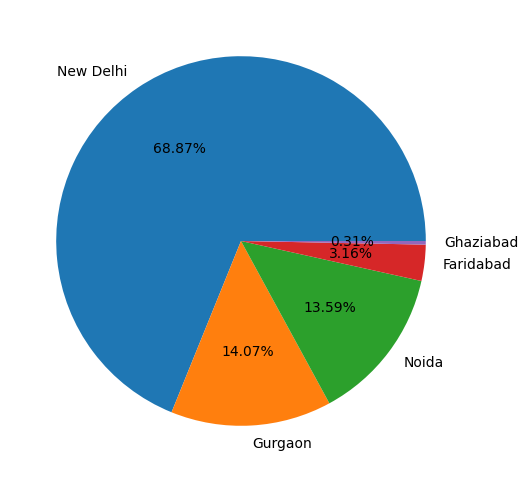

In [54]:
plt.pie(city_values[:5],labels= city_labels[:5],autopct='%1.2f%%')